In [67]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [5]:
# Load the Vehicle dataset
vehicle_data = pd.read_csv('C:\\Users\\lynet\\Downloads\\vehicle.csv') 
#X = vehicle_data.drop(columns=['class']) 

In [11]:
print(vehicle_data.head())

   COMPACTNESS  CIRCULARITY  'DISTANCE CIRCULARITY'  'RADIUS RATIO'  \
0           95           48                      83             178   
1           91           41                      84             141   
2          104           50                     106             209   
3           93           41                      82             159   
4           85           44                      70             205   

   'PR.AXIS ASPECT RATIO'  'MAX.LENGTH ASPECT RATIO'  'SCATTER RATIO'  \
0                      72                         10              162   
1                      57                          9              149   
2                      66                         10              207   
3                      63                          9              144   
4                     103                         52              149   

   ELONGATEDNESS  'PR.AXIS RECTANGULARITY'  'MAX.LENGTH RECTANGULARITY'  \
0             42                        20                 

In [15]:

# Drop the class label (if it exists)
X = vehicle_data.drop(columns=['Class'])
# Normalize the data and print
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(pd.DataFrame(X_scaled, columns=X.columns).head())

   COMPACTNESS  CIRCULARITY  'DISTANCE CIRCULARITY'  'RADIUS RATIO'  \
0     0.160580     0.508950                0.057819        0.270806   
1    -0.325470    -0.626268                0.121261       -0.835244   
2     1.254193     0.833298                1.517005        1.197496   
3    -0.082445    -0.626268               -0.005624       -0.297166   
4    -1.054545    -0.139746               -0.766939        1.077923   

   'PR.AXIS ASPECT RATIO'  'MAX.LENGTH ASPECT RATIO'  'SCATTER RATIO'  \
0                1.307291                   0.311542        -0.205844   
1               -0.595396                   0.094079        -0.597112   
2                0.546217                   0.311542         1.148544   
3                0.165679                   0.094079        -0.747600   
4                5.239511                   9.444962        -0.597112   

   ELONGATEDNESS  'PR.AXIS RECTANGULARITY'  'MAX.LENGTH RECTANGULARITY'  \
0       0.136570                 -0.224944                 

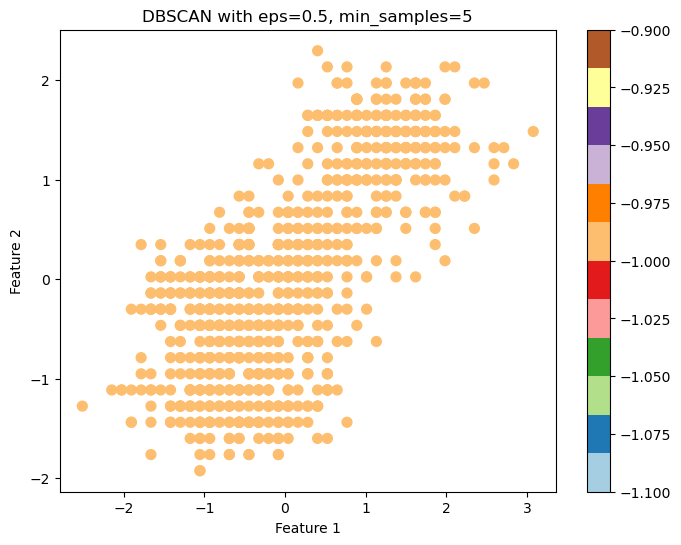

In [23]:
# DBSCAN experiment 1
dbscan_1 = DBSCAN(eps=0.2, min_samples=5)
dbscan_1.fit(X_scaled)

# Get the labels (clusters)
labels_1 = dbscan_1.labels_

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_1, cmap='Paired', s=50)
plt.title('DBSCAN with eps=0.5, min_samples=5')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

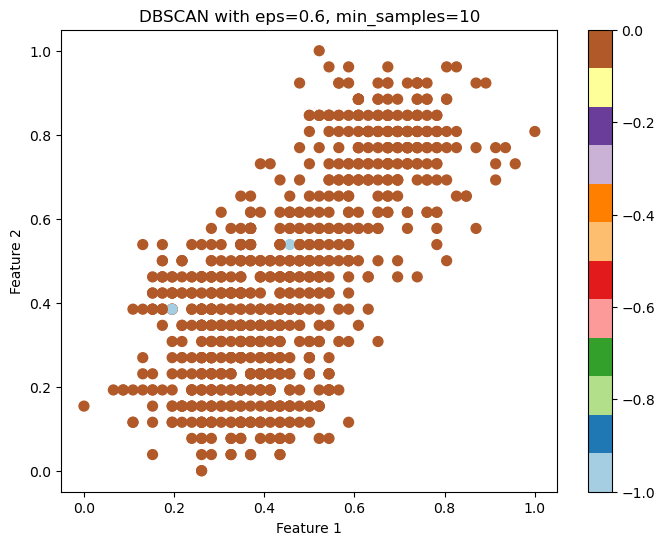

In [33]:
# Re-scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN experiment 2
dbscan_2 = DBSCAN(eps=0.6, min_samples=10)
dbscan_2.fit(X_scaled)

# Get the labels (clusters)
labels_2 = dbscan_2.labels_

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_2, cmap='Paired', s=50)
plt.title('DBSCAN with eps=0.6, min_samples=10')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()


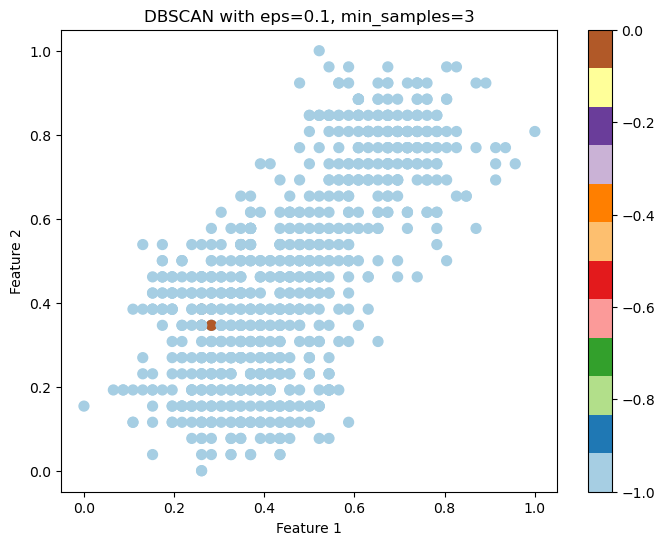

In [45]:
dbscan_3 = DBSCAN(eps=0.1, min_samples=3)
dbscan_3.fit(X_scaled)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_3.labels_, cmap='Paired', s=50)
plt.title('DBSCAN with eps=0.1, min_samples=3')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()


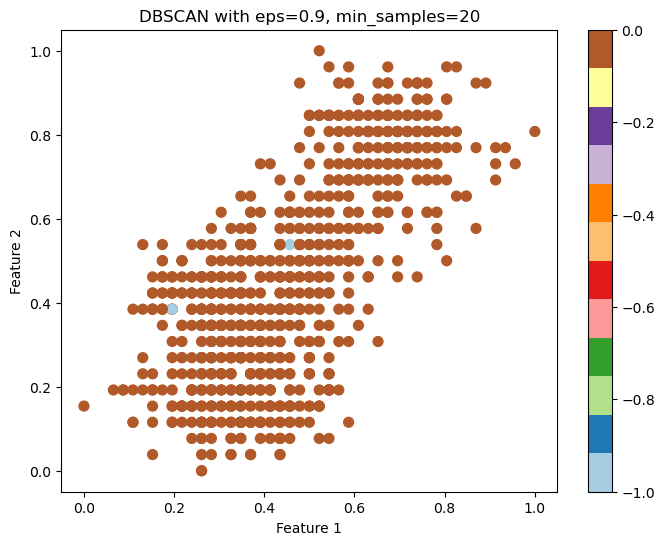

In [37]:
dbscan_2 = DBSCAN(eps=0.9, min_samples=20)
dbscan_2.fit(X_scaled)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_2.labels_, cmap='Paired', s=50)
plt.title('DBSCAN with eps=0.9, min_samples=20')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()


In [47]:
# Check the distribution of clusters for all three experiments
unique_labels_1, counts_1 = np.unique(dbscan_1.labels_, return_counts=True)
unique_labels_2, counts_2 = np.unique(dbscan_2.labels_, return_counts=True)
unique_labels_3, counts_3 = np.unique(dbscan_3.labels_, return_counts=True)

print("Experiment 1 - Cluster distribution (eps=0.5, min_samples=5):")
for label, count in zip(unique_labels_1, counts_1):
    print(f"Cluster {label}: {count} points")

print("\nExperiment 2 - Cluster distribution (eps=0.6, min_samples=10):")
for label, count in zip(unique_labels_2, counts_2):
    print(f"Cluster {label}: {count} points")

print("\nExperiment 3 - Cluster distribution (eps=0.1, min_samples=3):")
for label, count in zip(unique_labels_3, counts_3):
    print(f"Cluster {label}: {count} points")


Experiment 1 - Cluster distribution (eps=0.5, min_samples=5):
Cluster -1: 843 points
Cluster 0: 3 points

Experiment 2 - Cluster distribution (eps=0.6, min_samples=10):
Cluster -1: 6 points
Cluster 0: 840 points

Experiment 3 - Cluster distribution (eps=0.1, min_samples=3):
Cluster -1: 843 points
Cluster 0: 3 points


In [49]:
# Percentage of points labeled as noise (-1) in each experiment
noise_percentage_1 = np.sum(dbscan_1.labels_ == -1) / len(dbscan_1.labels_) * 100
noise_percentage_2 = np.sum(dbscan_2.labels_ == -1) / len(dbscan_2.labels_) * 100
noise_percentage_3 = np.sum(dbscan_3.labels_ == -1) / len(dbscan_3.labels_) * 100

print(f"\nNoise percentage in Experiment 1 (eps=0.5, min_samples=5): {noise_percentage_1:.2f}%")
print(f"Noise percentage in Experiment 2 (eps=0.6, min_samples=10): {noise_percentage_2:.2f}%")
print(f"Noise percentage in Experiment 3 (eps=0.1, min_samples=3): {noise_percentage_3:.2f}%")



Noise percentage in Experiment 1 (eps=0.5, min_samples=5): 99.65%
Noise percentage in Experiment 2 (eps=0.6, min_samples=10): 0.71%
Noise percentage in Experiment 3 (eps=0.1, min_samples=3): 99.65%


In [59]:

def plot_dbscan(dbscan, X, size, colors, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    # Plot core samples with cluster colors
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap=colors)
    
    # Plot core samples separately for clarity
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])

    # Plot anomalies
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=100)

    # Plot non-core samples with their cluster colors
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)


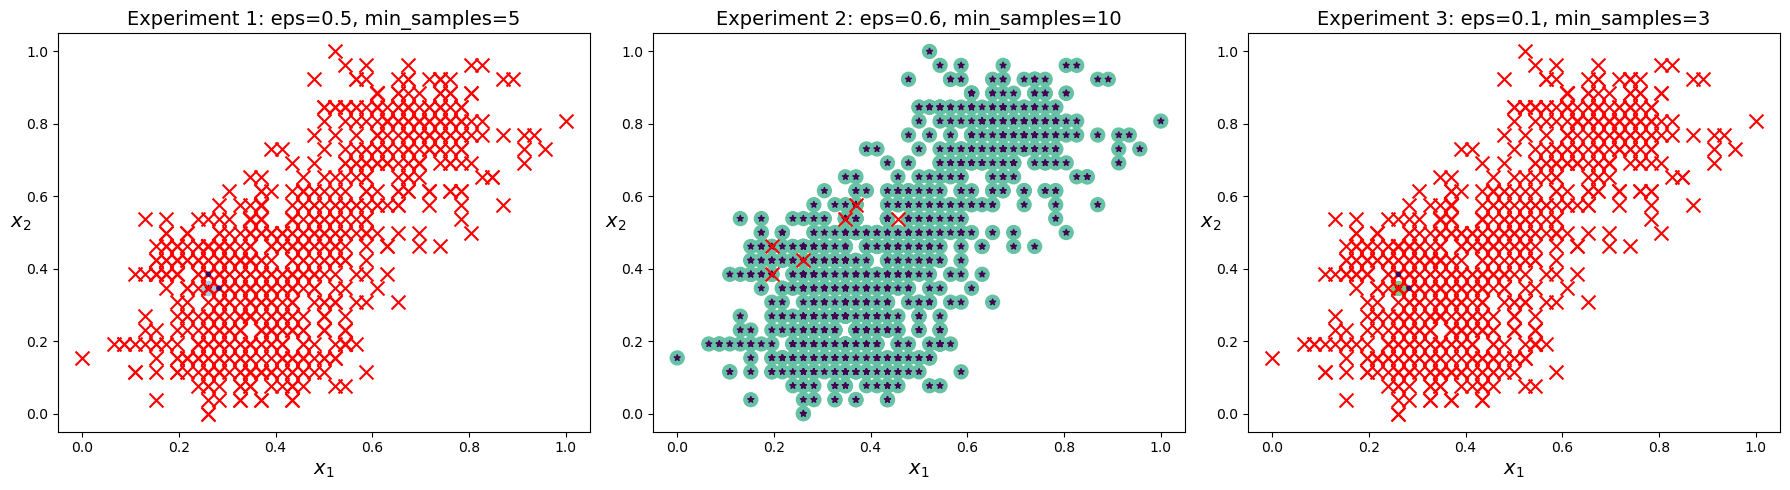

In [63]:
# Plot the results of all three experiments side by side with different colors
plt.figure(figsize=(18, 5))

plt.subplot(131)
plot_dbscan(dbscan_1, X_scaled, size=100, colors="Paired")
plt.title("Experiment 1: eps=0.5, min_samples=5", fontsize=14)

plt.subplot(132)
plot_dbscan(dbscan_2, X_scaled, size=100, colors="Set2")
plt.title("Experiment 2: eps=0.6, min_samples=10", fontsize=14)

plt.subplot(133)
plot_dbscan(dbscan_3, X_scaled, size=100, colors="Accent")
plt.title("Experiment 3: eps=0.1, min_samples=3", fontsize=14)

plt.tight_layout()
plt.show()



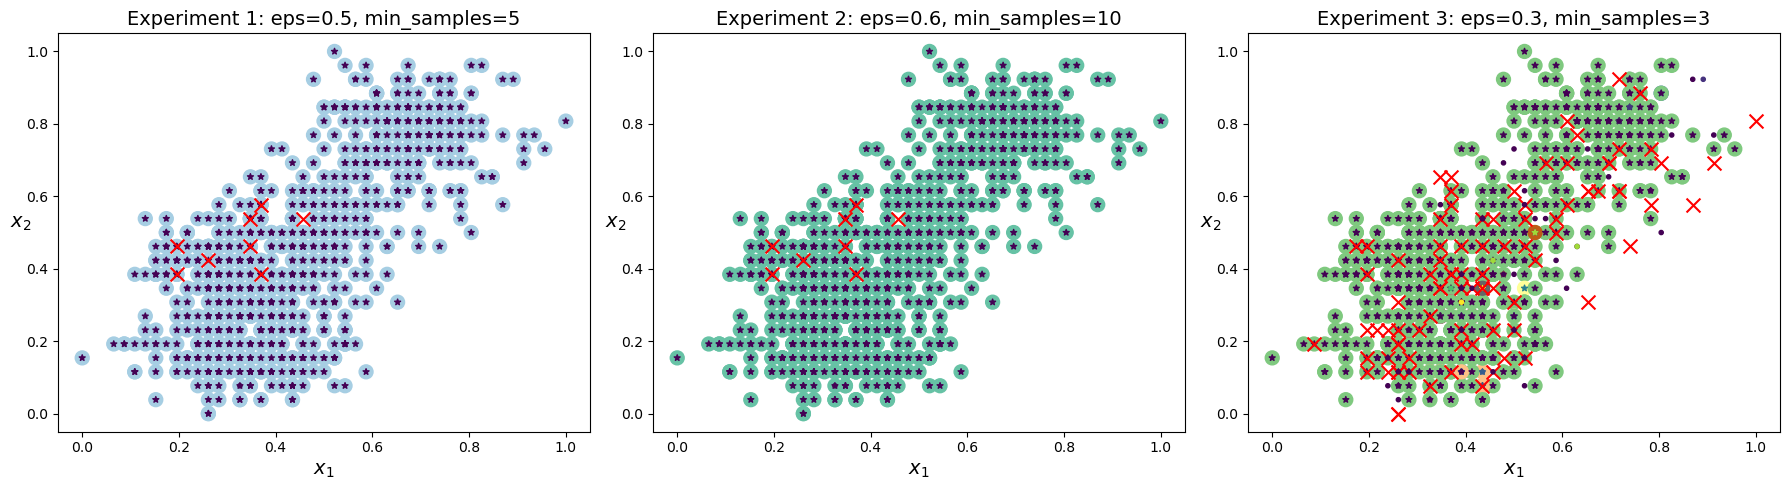

In [65]:

# Experiment 1: eps=0.5, min_samples=5
dbscan_1 = DBSCAN(eps=0.5, min_samples=5).fit(X_scaled)

# Experiment 2: eps=0.6, min_samples=10
dbscan_2 = DBSCAN(eps=0.6, min_samples=10).fit(X_scaled)

# Experiment 3: Increase eps to 0.3 for more distinct clusters
dbscan_3 = DBSCAN(eps=0.3, min_samples=3).fit(X_scaled)

# Plotting function
def plot_dbscan(dbscan, X, size, colors, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    # Plot core samples with cluster colors
    plt.scatter(cores[:, 0], cores[:, 1], 
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap=colors)

    # Plot core samples separately for clarity
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])

    # Plot anomalies
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=100)

    # Plot non-core samples with their cluster colors
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

# Plot the results of all three experiments side by side with different colors
plt.figure(figsize=(18, 5))

plt.subplot(131)
plot_dbscan(dbscan_1, X_scaled, size=100, colors="Paired")
plt.title("Experiment 1: eps=0.5, min_samples=5", fontsize=14)

plt.subplot(132)
plot_dbscan(dbscan_2, X_scaled, size=100, colors="Set2")
plt.title("Experiment 2: eps=0.6, min_samples=10", fontsize=14)

plt.subplot(133)
plot_dbscan(dbscan_3, X_scaled, size=100, colors="Accent")
plt.title("Experiment 3: eps=0.3, min_samples=3", fontsize=14)

plt.tight_layout()
plt.show()


In [69]:

# Select only core samples for KNN training
core_sample_mask = np.zeros_like(dbscan_1.labels_, dtype=bool)
core_sample_mask[dbscan_1.core_sample_indices_] = True

X_train = X_scaled[core_sample_mask] 
y_train = dbscan_1.labels_[core_sample_mask] 



In [71]:
# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  

# Fit the classifier
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [75]:
# Define new points to predict
X_new = np.array([
    [0.5, 0.5, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],  
    [1.5, 1.5, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1], 
])

# Predict the clusters for new points
predictions = knn.predict(X_new)

print("Predictions for new points:", predictions)

# If you want the probability of each cluster
probabilities = knn.predict_proba(X_new)
print("Predicted probabilities for new points:\n", probabilities)


Predictions for new points: [0 0]
Predicted probabilities for new points:
 [[1.]
 [1.]]


In [95]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters_dbscan, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Check the unique labels from K-Means
unique_kmeans_labels = np.unique(kmeans_labels)
print(f"Unique labels from K-Means: {unique_kmeans_labels}")



NameError: name 'n_clusters_dbscan' is not defined